In [2]:
%load_ext uhed

In [3]:
%slice gautamrams

In [4]:
%site vts-ukypks2

In [6]:
%lab

<IPython.core.display.Javascript object>

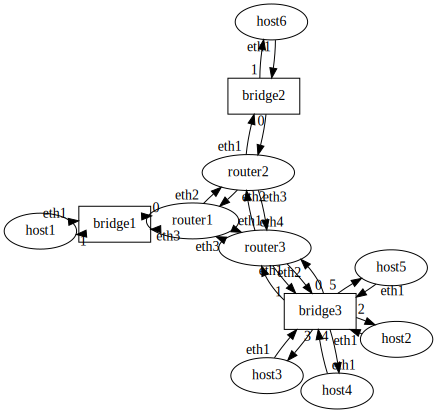

In [7]:
genish.showtopo(manifest,"neato")

In [8]:
SITE.IPv4Router.getRouteTable(context,SLICE,"router1")

,Selected,Network,Next Hop,Interface,Duration
O,True,10.20.85.0/24 [110/20],10.75.37.2,eth2,00:46:46
O,True,10.30.123.0/24 [110/20],10.77.91.2,eth1,00:46:47
O,True,10.40.139.0/24 [110/20],10.77.91.2,eth1,00:46:47
O,False,10.75.37.0/30 [110/10],directly connected,eth2,00:47:38
C,True,10.75.37.0/30,directly connected,eth2,None
O,True,10.76.31.0/30 [110/20],10.75.37.2,eth2,00:46:46
,False,,10.77.91.2,eth1,00:46:46
O,False,10.77.91.0/30 [110/10],directly connected,eth1,00:46:56
C,True,10.77.91.0/30,directly connected,eth1,None
C,True,127.0.0.0/8,directly connected,lo,None


In [21]:
SITE.IPv4Router.getRouteTable(context,SLICE,"router2")

,Selected,Network,Next Hop,Interface,Duration
O,False,10.20.85.0/24 [110/10],directly connected,eth1,04:21:21
C,True,10.20.85.0/24,directly connected,eth1,None
O,True,10.30.123.0/24 [110/20],10.76.31.2,eth3,04:20:36
O,True,10.40.139.0/24 [110/20],10.76.31.2,eth3,04:20:36
O,False,10.75.37.0/30 [110/10],directly connected,eth2,04:20:36
C,True,10.75.37.0/30,directly connected,eth2,None
O,False,10.76.31.0/30 [110/10],directly connected,eth3,04:20:39
C,True,10.76.31.0/30,directly connected,eth3,None
O,True,10.77.91.0/30 [110/20],10.75.37.1,eth2,04:20:29
,False,,10.76.31.2,eth3,04:20:29


In [16]:
SITE.IPv4Router.getRouteTable(context,SLICE,"router3")

,Selected,Network,Next Hop,Interface,Duration
O,True,10.20.85.0/24 [110/20],10.76.31.1,eth4,01:36:22
O,False,10.30.123.0/24 [110/10],directly connected,eth2,01:37:06
C,True,10.30.123.0/24,directly connected,eth2,None
O,False,10.40.139.0/24 [110/10],directly connected,eth1,01:37:06
C,True,10.40.139.0/24,directly connected,eth1,None
O,True,10.75.37.0/30 [110/20],10.76.31.1,eth4,01:36:22
,False,,10.77.91.1,eth3,01:36:22
O,False,10.76.31.0/30 [110/10],directly connected,eth4,01:37:06
C,True,10.76.31.0/30,directly connected,eth4,None
O,False,10.77.91.0/30 [110/10],directly connected,eth3,01:37:05


In [23]:
SITE.getL2Table(context,SLICE,"bridge1")

Port,VLAN,MAC,Age


In [22]:
SITE.getL2Table(context,SLICE,"bridge2")

Port,VLAN,MAC,Age
1,0,f2:07:89:6e:c4:f3,9


In [24]:
SITE.getL2Table(context,SLICE,"bridge3")

Port,VLAN,MAC,Age
1,2257,66:1d:5c:46:20:a3,2
2,3838,4a:0a:19:a2:c4:dc,2


In [25]:
SITE.getPortInfo(context,SLICE,"bridge1")

Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge1:1,3280,None,1500,up,up,2286 (47),411946 (7917)
bridge1:0,3266,None,1500,up,down,834 (11),2156 (37)


In [26]:
SITE.getPortInfo(context,SLICE,"bridge2")

Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge2:1,3290,None,1500,up,up,648 (8),535034 (9495)
bridge2:0,3268,None,1500,up,up,124026 (1591),411864 (7916)


In [27]:
SITE.getPortInfo(context,SLICE,"bridge3")

Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge3:3,3284,3838,1500,up,up,1124 (14),535744 (9505)
bridge3:4,3286,3280,1500,up,up,648 (8),411812 (7915)
bridge3:1,3272,2257,1500,up,up,124104 (1592),411968 (7918)
bridge3:0,3274,3838,1500,up,up,124104 (1592),411958 (7918)
bridge3:5,3288,2257,1500,up,up,648 (8),535216 (9498)
bridge3:2,3282,3838,1500,up,up,1124 (14),535744 (9505)


In [32]:
SITE.Host.getRouteTable(context,SLICE,"host1")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.10.107.254,eth1
10.10.107.0,255.255.255.0,0.0.0.0,eth1


In [28]:
SITE.Host.getRouteTable(context,SLICE,"host2")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.30.123.254,eth1
10.30.123.0,255.255.255.0,0.0.0.0,eth1


In [19]:
SITE.Host.getRouteTable(context,SLICE,"host3")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.30.123.20,eth1
10.30.123.0,255.255.255.0,0.0.0.0,eth1


In [29]:
SITE.Host.getRouteTable(context,SLICE,"host4")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.40.139.254,eth1
10.40.139.0,255.255.255.0,0.0.0.0,eth1


In [30]:
SITE.Host.getRouteTable(context,SLICE,"host5")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.40.139.254,eth1
10.40.139.0,255.255.255.0,0.0.0.0,eth1


In [31]:
SITE.Host.getRouteTable(context,SLICE,"host6")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.20.85.254,eth1
10.20.85.0,255.255.255.0,0.0.0.0,eth1


### Issues in Topology and their solutions ###

In [20]:
SITE.getPortInfo(context,SLICE,"bridge3")

Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge3:3,3284,3838,1500,up,up,1124 (14),286846 (5087)
bridge3:4,3286,3280,1500,up,up,648 (8),220400 (4234)
bridge3:1,3272,2257,1500,up,up,66618 (855),220556 (4237)
bridge3:0,3274,3838,1500,up,up,66618 (855),220546 (4237)
bridge3:5,3288,2257,1500,up,up,648 (8),286318 (5080)
bridge3:2,3282,3838,1500,up,up,1124 (14),286846 (5087)


ISSUE 2 : 

The above table shows the VLAN of bridge3 ports. It can be noticed that bridge 3 port 4 has a different vlan 3280,whereas the other ports have vlan of 2257 and 3838.

host4 is unable to ping other host or other host cannot ping host4 because bridge3:4 has an unique VLAN ID.

Ping host4 from host2

/ # ping -c 3 10.40.139.78
PING 10.40.139.78 (10.40.139.78) 56(84) bytes of data.
From 10.30.123.254 icmp_seq=1 Destination Host Unreachable
From 10.30.123.254 icmp_seq=2 Destination Host Unreachable
From 10.30.123.254 icmp_seq=3 Destination Host Unreachable

--- 10.40.139.78 ping statistics ---
3 packets transmitted, 0 received, +3 errors, 100% packet loss, time 2006ms
pipe 3
/ #

Ping host5 from host4

/ # ping -c 3 10.40.139.140
PING 10.40.139.140 (10.40.139.140) 56(84) bytes of data.
From 10.40.139.78 icmp_seq=1 Destination Host Unreachable
From 10.40.139.78 icmp_seq=2 Destination Host Unreachable
From 10.40.139.78 icmp_seq=3 Destination Host Unreachable

--- 10.40.139.140 ping statistics ---
3 packets transmitted, 0 received, +3 errors, 100% packet loss, time 2015ms
pipe 3
/ #

    
SOLUTION FOR ISSUE 2:

This issue can be fixed by changing the vlan from 3280 to 2257, since the host5 at bridge3 port 5 has the vlan of 2257 and both host4 and host5 are in same subnet.The following command assigns VLAN to bridge3:4. 

SITE.setPortVLAN(context, SLICE, ("bridge3:4",2257)) 

In the below tables it can be noted that the vlan of the port4 is changed to 2257 and on seeing the ping results from host2 to host4 and host4 to host5 i can infer the issue is fixed.

Ping host4 from host2 

/ # ping -c 3 10.40.139.78
PING 10.40.139.78 (10.40.139.78) 56(84) bytes of data.
64 bytes from 10.40.139.78: icmp_seq=1 ttl=63 time=1.41 ms
64 bytes from 10.40.139.78: icmp_seq=2 ttl=63 time=0.135 ms
64 bytes from 10.40.139.78: icmp_seq=3 ttl=63 time=0.113 ms

--- 10.40.139.78 ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2001ms
rtt min/avg/max/mdev = 0.113/0.553/1.411/0.606 ms
/ #

Ping host5 from host4

/ # ping -c 3 10.40.139.140
PING 10.40.139.140 (10.40.139.140) 56(84) bytes of data.
64 bytes from 10.40.139.140: icmp_seq=1 ttl=64 time=1.10 ms
64 bytes from 10.40.139.140: icmp_seq=2 ttl=64 time=0.089 ms
64 bytes from 10.40.139.140: icmp_seq=3 ttl=64 time=0.092 ms

--- 10.40.139.140 ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2000ms
rtt min/avg/max/mdev = 0.089/0.428/1.105/0.478 ms
/ #

In [37]:
SITE.setPortVLAN(context, SLICE, ("bridge3:4",2257))

{'errors': []}

In [38]:
SITE.getPortInfo(context,SLICE,"bridge3")

Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge3:3,3284,3838,1500,up,up,1698 (21),621864 (11031)
bridge3:4,3286,2257,1500,up,up,1152 (16),482052 (9237)
bridge3:1,3272,2257,1500,up,up,144342 (1853),478074 (9187)
bridge3:0,3274,3838,1500,up,up,144678 (1855),478484 (9193)
bridge3:5,3288,2257,1500,up,up,648 (8),620846 (11019)
bridge3:2,3282,3838,1500,up,up,2454 (31),622620 (11039)


ISSUE 3:

Ping from host3 to host5 fails because there is a misconfiguration for gateway and it can be noted by comparing the gateway ip in host3 and gateway ip in router.  

Ping result from host3 to host5

/ # ping -c 3 10.40.139.140
PING 10.40.139.140 (10.40.139.140) 56(84) bytes of data.
From 10.30.123.76 icmp_seq=1 Destination Host Unreachable
From 10.30.123.76 icmp_seq=2 Destination Host Unreachable
From 10.30.123.76 icmp_seq=3 Destination Host Unreachable

--- 10.40.139.140 ping statistics ---
3 packets transmitted, 0 received, +3 errors, 100% packet loss, time 1999ms
pipe 3
/ #

Gateway specified in host3

gramasam@cot-cn:~$ gssh gautamrams host3
/ # ip route sh
default via 10.30.123.20 dev eth1
10.30.123.0/24 dev eth1  src 10.30.123.76
/ #

Gateway specified in router3

Interface eth2 is up, line protocol is up
  Link ups:       1  last: Sun, 10 Dec 2017 17:02:26 +0000
  Link downs:     0  last: (never)
  vrf: 0
  index 3275 metric 0 mtu 1500
  flags: <UP,BROADCAST,RUNNING,MULTICAST>
  Type: Ethernet
  HWaddr: 4a:0a:19:a2:c4:dc
  inet 10.30.123.254/24
  inet6 fe80::480a:19ff:fea2:c4dc/64

SOLUTION FOR ISSUE 3:

The Gateway of the host3 has to be changed from 10.30.149.172 to 10.30.149.254 . Once the proper gateway is configured, host3 can ping the other hosts in the topology.